## My Goal

* Import Data
* Take The Label from the data
* Take the image name from the data
* visualize random images
* turn to images to numpy array and enlarge the data
* build the model
* visualize the result of model

# Find the direction of dataset
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Flatten
from keras import optimizers
from keras import losses
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
import random # for visualization
from sklearn.preprocessing import LabelEncoder
print('Libraries Imported')

Libraries Imported


In [2]:
path = '../input/mias-mammography/all-mias/'

an example of image path

../input/mias-mammography/all-mias/mdb001.pgm

## Read Data

In [3]:
print("reading dataframe")
info=pd.read_csv("../input/mias-mammography/Info.txt",sep=" ")
info=info.drop('Unnamed: 7',axis=1)

reading dataframe


In [4]:
info

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,mdb003,D,NORM,NaN,NaN,NaN,NaN
3,mdb004,D,NORM,NaN,NaN,NaN,NaN
4,mdb005,F,CIRC,B,477.0,133.0,30.0
...,...,...,...,...,...,...,...
325,mdb318,D,NORM,NaN,NaN,NaN,NaN
326,mdb319,D,NORM,NaN,NaN,NaN,NaN
327,mdb320,D,NORM,NaN,NaN,NaN,NaN
328,mdb321,D,NORM,NaN,NaN,NaN,NaN


In [5]:
info.dropna(subset = ["SEVERITY"], inplace=True)

info.reset_index(inplace = True)
info

,index,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,4,mdb005,F,CIRC,B,477.0,133.0,30.0
3,5,mdb005,F,CIRC,B,500.0,168.0,26.0
4,10,mdb010,F,CIRC,B,525.0,425.0,33.0
...,...,...,...,...,...,...,...,...
118,281,mdb274,F,MISC,M,127.0,505.0,123.0
119,297,mdb290,D,CIRC,B,337.0,353.0,45.0
120,319,mdb312,F,MISC,B,240.0,263.0,20.0
121,321,mdb314,F,MISC,B,518.0,191.0,39.0


In [6]:
info = info.drop([3], axis=0)
info.reset_index(inplace = True)
info = info.drop('level_0', axis =1)
info = info.drop('index', axis =1)
info

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,mdb005,F,CIRC,B,477.0,133.0,30.0
3,mdb010,F,CIRC,B,525.0,425.0,33.0
4,mdb012,F,CIRC,B,471.0,458.0,40.0
...,...,...,...,...,...,...,...
117,mdb274,F,MISC,M,127.0,505.0,123.0
118,mdb290,D,CIRC,B,337.0,353.0,45.0
119,mdb312,F,MISC,B,240.0,263.0,20.0
120,mdb314,F,MISC,B,518.0,191.0,39.0


In [7]:
print(info.isna().sum())

REFNUM      0
BG          0
CLASS       0
SEVERITY    0
X           4
Y           4
RADIUS      4
dtype: int64


In [8]:
info_temp = info.dropna()

In [9]:
print(info_temp.isna().sum())

REFNUM      0
BG          0
CLASS       0
SEVERITY    0
X           0
Y           0
RADIUS      0
dtype: int64


In [10]:
info_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 121
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   REFNUM    118 non-null    object 
 1   BG        118 non-null    object 
 2   CLASS     118 non-null    object 
 3   SEVERITY  118 non-null    object 
 4   X         118 non-null    float64
 5   Y         118 non-null    float64
 6   RADIUS    118 non-null    float64
dtypes: float64(3), object(4)
memory usage: 7.4+ KB


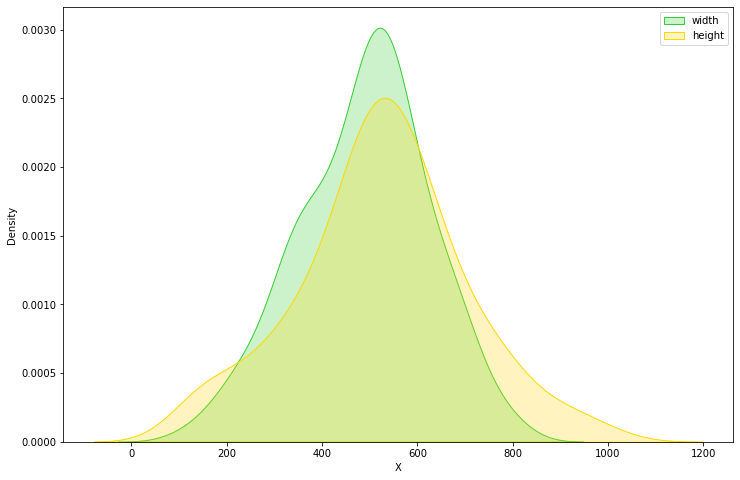

In [11]:
plt.figure(figsize=(12,8))
sns.kdeplot(info['X'], shade=True, color='limegreen')
sns.kdeplot(info['Y'], shade=True, color='gold')
plt.legend(['width','height'])

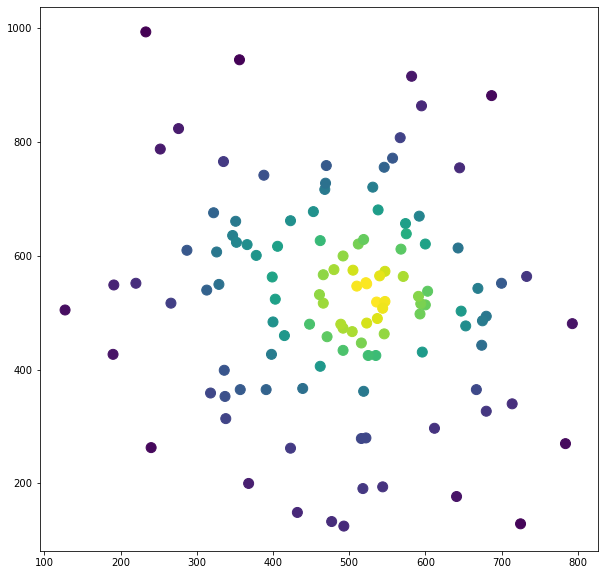

In [12]:
from scipy.stats import gaussian_kde


x_val = info_temp.X.values
y_val = info_temp.Y.values

# Calculate the point density
xy = np.vstack([x_val,y_val])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots(figsize = (10, 10))
# ax.axis('off')
ax.scatter(x_val, y_val, c=z, s=100, cmap='viridis')
# ax.set_xlabel('x_mid')
# ax.set_ylabel('y_mid')
plt.show()

<AxesSubplot:xlabel='X', ylabel='Y'>

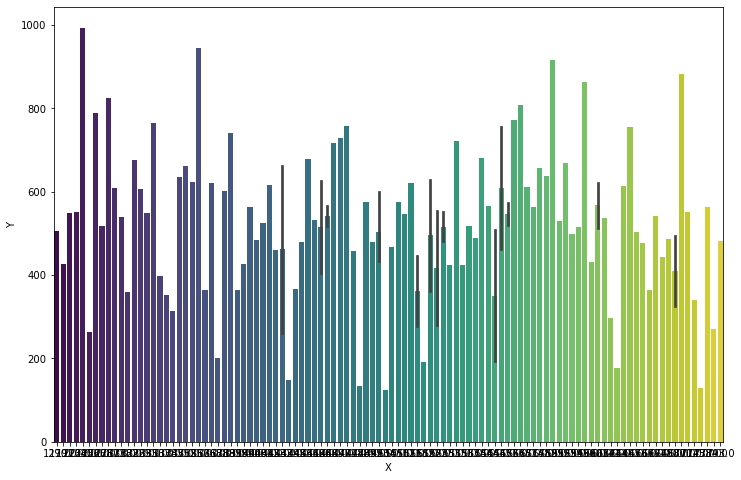

In [13]:
plt.figure(figsize=(12,8))
sns.barplot(data=info_temp, x="X", y="Y", palette='viridis')
#.plot.bar(rot=0, color=['deepskyblue', 'royalblue', 'deeppink'])

<Figure size 864x576 with 0 Axes>

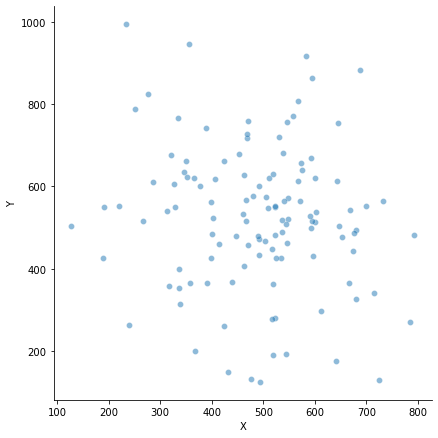

In [14]:
plt.figure(figsize=(12,8))
sns.relplot(data=info_temp, x="X", y="Y", sizes=(40, 400), alpha=.5, palette="viridis",height=6)
#.plot.bar(rot=0, color=['deepskyblue', 'royalblue', 'deeppink'])

<Figure size 864x576 with 0 Axes>

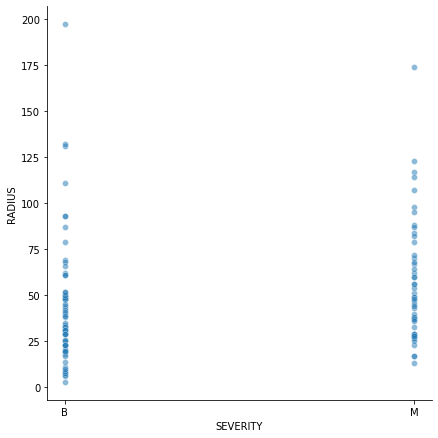

In [15]:
plt.figure(figsize=(12,8))
sns.relplot(x="SEVERITY", y="RADIUS", sizes=(40, 400), alpha=.5, palette="muted", height=6, data=info_temp)

Understanding the severity of malignant and benign does not affect on the radius of the cancer spread throughout the breast.

<AxesSubplot:xlabel='SEVERITY', ylabel='count'>

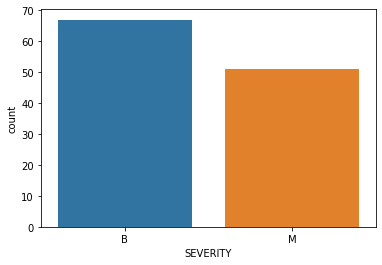

In [16]:
sns.countplot(data = info_temp, x = 'SEVERITY')

<AxesSubplot:xlabel='RADIUS', ylabel='X'>

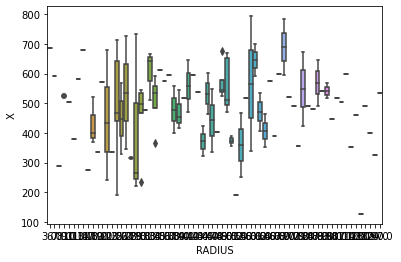

In [17]:
sns.boxplot(data = info_temp, x='RADIUS', y='X')

<AxesSubplot:xlabel='RADIUS', ylabel='Y'>

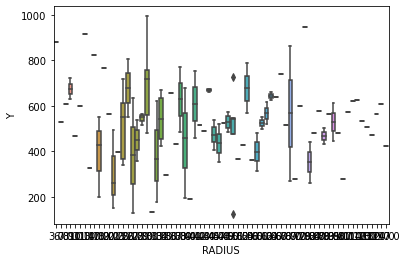

In [18]:
sns.boxplot(data = info_temp, x='RADIUS', y='Y')

In [19]:
pip install dataprep

     |████████████████████████████████| 9.5 MB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 19.0 MB/s eta 0:00:01
     |████████████████████████████████| 749 kB 56.6 MB/s eta 0:00:01
     |████████████████████████████████| 133 kB 54.1 MB/s eta 0:00:01
     |████████████████████████████████| 15.7 MB 34.3 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 38.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 59.1 MB/s eta 0:00:01
     |████████████████████████████████| 101 kB 11.0 MB/s ta 0:00:01
     |████████████████████████████████| 966 kB 62.7 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 5.8 MB/s  eta 0:00:01
     |████████████████████████████████| 1.6 MB 52.2 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 6.9 MB/s  eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.0 MB 51

In [21]:
from dataprep.eda import plot
# from dataprep.datasets import load_dataset
# import numpy as np
# plot(info_temp)

ImportError: cannot import name 'Markup' from 'jinja2' (/opt/conda/lib/python3.7/site-packages/jinja2/__init__.py)

In [22]:
# B = 0
# M = 1
lb = LabelEncoder()
info['SEVERITY'] = lb.fit_transform(info['SEVERITY'])
info

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,CIRC,0,535.0,425.0,197.0
1,mdb002,G,CIRC,0,522.0,280.0,69.0
2,mdb005,F,CIRC,0,477.0,133.0,30.0
3,mdb010,F,CIRC,0,525.0,425.0,33.0
4,mdb012,F,CIRC,0,471.0,458.0,40.0
...,...,...,...,...,...,...,...
117,mdb274,F,MISC,1,127.0,505.0,123.0
118,mdb290,D,CIRC,0,337.0,353.0,45.0
119,mdb312,F,MISC,0,240.0,263.0,20.0
120,mdb314,F,MISC,0,518.0,191.0,39.0


In [27]:

label = info.SEVERITY
label = np.array(label)
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

## Turning our outputs B-M to 1-0

# Turning our outputs B-M to 1-0
label = []
for i in range(len(info)):
    if info.SEVERITY[i] == 'B':
        label.append(1)
    else:
        label.append(0)

In [28]:
# define the every images filepaths in to list
img_name = []

for i in range(len(label)):
        img_name.append(path + info.REFNUM[i]+ '.pgm')

In [29]:
img_name = np.array(img_name)

In [30]:
#print(img_name)
print(f'image addres amount {img_name.shape}')

image addres amount (122,)


Text(0.5, 1.0, '0')

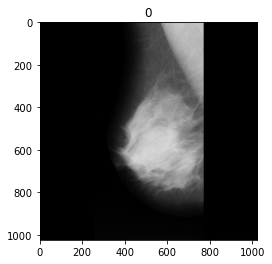

In [31]:
plt.imshow(cv2.imread(img_name[0]))
plt.title(label[0])

## view image random images

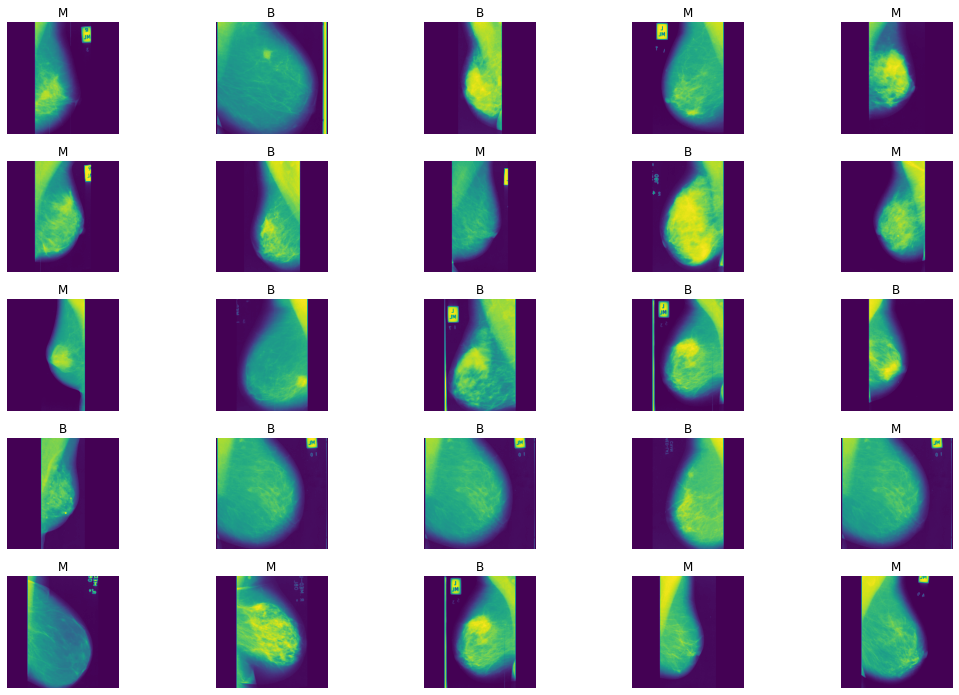

In [32]:
# view image random images
def view_25_random_image():
    fig = plt.figure(figsize = (15, 10))
    for i in range(25):
        rand = random.randint(0,len(label))
        ax = plt.subplot(5, 5, i+1)
    
        img = cv2.imread(img_name[rand], 0)
        img = cv2.resize(img, (256,256))
        if label[rand] == 1:
            plt.title('B')
        else:
            plt.title('M')
        plt.tight_layout()
        plt.axis('off')
        plt.imshow(img)
    fig.savefig('random_25_image_fig.png')

view_25_random_image()

## read Images and labels. and augmentation of images

In [36]:
img_path = []
last_label = []
for i in range(len(img_name)):
    
    img = cv2.imread(img_name[i], 0)
    img = cv2.resize(img, (224,224))
    rows, cols= img.shape
    for angle in range(0, 360):
            M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)    #Rotate 0 degree
            img_rotated = cv2.warpAffine(img, M, (224, 224))
            img_path.append(img_rotated)
            last_label.append(label[i])
            
            #if label[i] == 1:
            #    last_label.append(1)
            #else:
            #    last_label.append(0)


In [34]:
last_label = np.array(last_label)
last_label

array([0, 0, 0, ..., 0, 0, 0])

## split train and test set

In [35]:
# split train and test set
x_train, x_test, y_train, y_test = train_test_split(img_path, last_label, test_size = 0.25, random_state = 42)

In [ ]:
len(x_train),len(x_test),len(y_train),len(y_test)

In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
x_train = np.reshape(x_train, (32940,224, 224, 1)) # 1 for gray scale
x_test = np.reshape(x_test, (10980,224, 224,1))

## Build a Model

In [ ]:

def create_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(224, 224, 1)))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Conv2D(32, kernel_size=(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Conv2D(32, kernel_size=(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Conv2D(32, kernel_size=(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Flatten())
    #model.add(Dense(128, activation = 'relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [ ]:
model = create_model()
model.summary()

## Define Callbacks

In [ ]:

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=0,restore_best_weights=True, verbose=1)

check_point_filepath = './'

model_check_point = ModelCheckpoint(filepath =check_point_filepath, monitor='val_loss', verbose=1, save_best_only=True,
                                    save_weights_only=False, mode='auto', save_freq='epoch')

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(x_train,
                 y_train,
                 validation_split=0.2,
                 epochs=100,
                 batch_size=64,
                 callbacks=[early_stop])



In [ ]:
y_test = np.array(y_test)
loss_value , accuracy = model.evaluate(x_test, y_test)

print('Test_loss_value = ' +str(loss_value))
print('test_accuracy = ' + str(accuracy))

print(model.predict(x_test))

## Let's Visualize our result

In [ ]:

def Visualize_Result(acc,val_acc,loss, val_loss):
    fig, (ax1, ax2) = plt.subplots(nrows = 1,
                                   ncols = 2,
                                   figsize = (15,6),
                                   sharex =True)

    plot1 = ax1.plot(range(0, len(acc)),
                     acc,
                     label = 'accuracy')

    plot2 = ax1.plot(range(0, len(val_acc)),
                     val_acc,
                     label = 'val_accuracy')

    ax1.set(title = 'Accuracy And Val Accuracy progress',
            xlabel = 'epoch',
            ylabel = 'accuracy/ validation accuracy')

    ax1.legend()

    plot3 = ax2.plot(range(0, len(loss)),
                     loss,
                     label = 'loss')
    
    plot4 = ax2.plot(range(0, len(val_loss)),
                     val_loss,
                     label = 'val_loss')
    
    ax2.set(title = 'Loss And Val loss progress',
            xlabel = 'epoch',
            ylabel = 'loss/ validation loss')

    ax2.legend()

    fig.suptitle('Result Of Model', fontsize = 20, fontweight = 'bold')
    fig.savefig('Accuracy_Loss_figure.png')
    plt.tight_layout()
    plt.show()

visualize_result = Visualize_Result(hist.history['accuracy'],hist.history['val_accuracy'], hist.history['loss'], hist.history['val_loss'])

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred.shape

In [ ]:
len(last_label)

In [ ]:
y_test

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

#roc plot for specific class
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANNROC')
plt.legend(loc="lower right")
plt.show()